# Goal: receive sensor data from the application PhonePi

### STARTING

See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html

See https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks

See https://www.w3schools.com/python

The application PhonePi See: https://play.google.com/store/apps/details?id=com.phonepi

# HANDS ON  

* title
    * a
    * b
     * c

pip3 install flask
pip3 install flask_sockets
pip install paho-mqtt

RUN
python PhonePiPython3.py

$e^{i\pi} + 1 = 0$

# Zen of python

In [ ]:
import this

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt
costs = [1.0,4.5,9.5,16.0]
#plt.ylabel('some numbers')
#plt.plot(costs)
plt.plot([1.0, 2, 3, 4.0], costs)
plt.show()

## Sender

In [ ]:
import time
import paho.mqtt.client as paho
broker="192.168.1.6"
client= paho.Client("mqttpythonsender") #create client object client1.on_publish = on_publish #assign function to callback client1.connect(broker,port) #establish connection client1.publish("house/bulb1","on")
print("connecting to broker ",broker)
client.connect(broker)                       #connect
time.sleep(1)
print("publishing ")
client.publish("unibo/livestream","2")         #publish
time.sleep(1)
print("publishing ")
client.publish("unibo/livestream","4")         #publish
time.sleep(1)
print("publishing ")
client.publish("unibo/livestream","9")         #publish
time.sleep(1)
client.disconnect()                        #disconnect
print("bye" )

## mqttReceiver.py

connected to broker  localhost
subscribing to unibo/qak/events
first -158.95612387425535 rot 0 count 0
rot: 0.0 count 0
first -158.95626047803876 rot 0 count 1
rot: 0.0 count 1
first -158.95595994971526 rot 0 count 2
rot: 0.0 count 2
rot: 2.7320756686322056e-05 count 3
rot: 2.7320756686322056e-05 count 4
rot: 0.00015026416173213875 count 5
rot: 0.0001775849184184608 count 6
rot: 6.830189170159429e-05 count 7
rot: 0.0003005283234926992 count 8
rot: 4.098113501527223e-05 count 9
rot: 7.149295608035743 count 10
rot: 23.20748015808593 count 11
rot: 39.844741806348125 count 12
rot: 55.88257922286083 count 13
rot: 73.56287905927567 count 14
rot: 92.99159120999789 count 15
first -158.95595994971526 rot 92.99159120999789 count 15


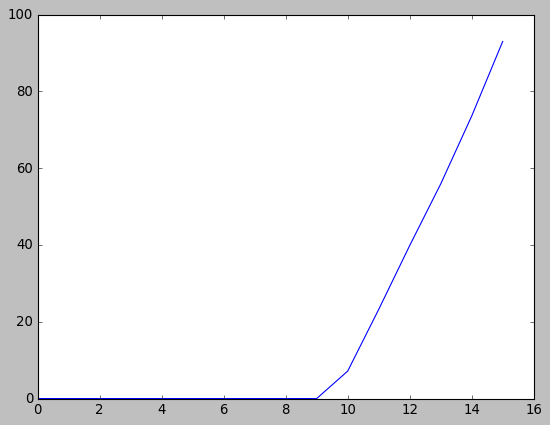

bye


In [23]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="localhost"
duration = 20
data     = []
counter  = 0
firstVal = 0
rot      = 0

def on_message(client, userdata, message) :   #define callback
    global counter, rot, data, firstVal   
    if rot > 90  : 
        client.disconnect()             #disconnect
        return    
    msg      = str( message.payload.decode("utf-8")  )
    msgitems = msg.split(",")
    value    = msgitems[5]
    v       =  float( msgitems[5] )  
    #print( v )
    if counter <= 2 :
        firstVal  = v
        rot       = 0
        print("first",firstVal, "rot", rot, "count",counter)
    rot  = abs( v -  firstVal )
    print("rot:", rot, "count",counter )
    if rot < 90  :
        counter = counter + 1
        data.append( rot )  
        if rot > 85  :
        	print("WARNING ... rot=", rot )
    else :
        data.append( rot ) 
        print("first",firstVal, "rot", rot, "count",counter)
        plt.plot(data)
        plt.show()   
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback
client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop 

   

## mqttPlotQakEvents.py

In [ ]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="localhost"
duration = 20
data     = []
counter  = 0 
def on_message(client, userdata, message) :   #define callback
	global counter,  data
	#msg(androidSensor,event,android,none,androidSensor(TYPE,X,Y,Z),MSGNUM)
	evMsg = str( message.payload.decode("utf-8")  )
	#print("evMsg=", evMsg )
	msgitems = evMsg.split(",")
	v        =  float( msgitems[5] ) #5 => X (AZIMUTH for rotation)
	#print("v=", v )
	if counter	< 20  :
		counter = counter + 1
		data.append( v )
	else  :
		plt.plot(data)
		plt.show()
		data = []
		counter = 0       
 	
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback
client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop        


connected to broker  localhost
subscribing to unibo/qak/events
startTime= 1566144460.7233396
v= 0.00164794921875 angle= 0.003305778736830689 elapsed= 2.005995512008667 da= 0.003305778736830689
v= -4.57763671875e-05 angle= 0.003321068037621444 elapsed= 0.3339998722076416 da= 1.5289300790755078e-05
v= -4.57763671875e-05 angle= 0.003323173674289137 elapsed= 0.045998334884643555 da= 2.105636667693034e-06
v= -0.0002593994140625 angle= 0.003397621476324275 elapsed= 0.2870006561279297 da= 7.444780203513801e-05
v= 0.0001678466796875 angle= 0.003405342584301252 elapsed= 0.04600095748901367 da= 7.721107976976782e-06
v= -0.0004730224609375 angle= 0.003544410807080567 elapsed= 0.29399919509887695 da= 0.00013906822277931497
v= 0.001220703125 angle= 0.003955787047743797 elapsed= 0.33699941635131836 da= 0.0004113762406632304
v= -0.0013275146484375 angle= 0.00401552657422144 elapsed= 0.04500102996826172 da= 5.973952647764236e-05
v= 0.0001678466796875 angle= 0.004062691594299395 elapsed= 0.281000614166

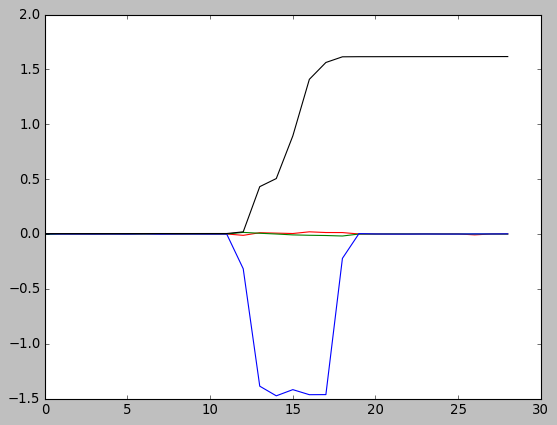

bye


In [19]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="localhost"
duration = 15
x        = []
y        = []
z        = []
r        = []
counter  = 0 
maxnum   = 30
endOfJob = False
dt       = 0
startTime = 0
angle     = 0.0

def on_message(client, userdata, message) :   #define callback
	global counter, maxnum, endOfJob, x, y, z, r, startTime, angle
	if endOfJob  :
 		return
	now     = time.time() 
	elapsed = now-startTime
	#print( "now=" , now, "elapsed=",  elapsed)
	startTime = now
	counter = counter + 1
	#msg(androidSensor,event,android,none,androidSensor(TYPE,X,Y,Z),MSGNUM)
	evMsg = str( message.payload.decode("utf-8")  )
	#print("evMsg=", evMsg )
	msgitems = evMsg.split(",")
	x.append( float( msgitems[5] ) )
	v = float( msgitems[6] )
	y.append( v )
	v = float( msgitems[7].split(')')[0] )
	z.append( v )
	
	da    = abs(v) * elapsed
	angle = angle + da
	print("v=", v, "angle=", angle, "elapsed=",  elapsed, "da=", da ) 
	r.append( angle )
	
	if counter	> maxnum  :
		plt.plot(x, color='red')
		plt.plot(y, color='green')
		plt.plot(z, color='blue')
		plt.plot(r, color='black')
		plt.show()
		endOfJob = True  		 	
    
plt.style.use("classic")
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback
client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe
startTime     = time.time() 
#print( "startTime=" , time.localtime( startTime ) )
print( "startTime=" , startTime )
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop        
     
